In [1]:
import rasterio

In [4]:
import geopandas as gpd

In [38]:
import pandas as pd
import numpy as np


In [7]:
raster_data=rasterio.open('nepal_lc_2020.tif')

In [8]:
raster_data


<open DatasetReader name='nepal_lc_2020.tif' mode='r'>

In [9]:
ds=raster_data.read()

In [10]:
ds

array([[[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]]], dtype=uint8)

In [12]:
raster_data.meta

{'driver': 'GTiff',
 'dtype': 'uint8',
 'nodata': 255.0,
 'width': 2932,
 'height': 1485,
 'count': 1,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(0.0027777777777780012, 0.0, 80.05847091000004,
        0.0, -0.0027777777777780012, 30.472819010000357)}

In [13]:
raster_data.shape

(1485, 2932)

In [14]:
raster_data.mode

'r'

In [17]:
ds.data

In [24]:
from rasterio.plot import show,show_hist

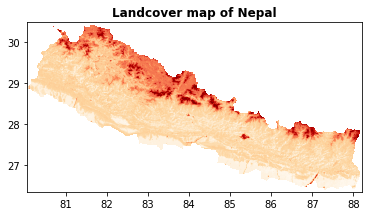

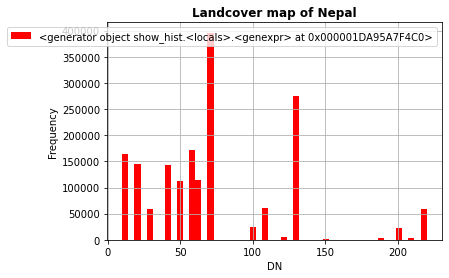

In [32]:
show(raster_data,cmap='OrRd',title='Landcover map of Nepal')
show_hist(raster_data,bins=50,title='Landcover map of Nepal')

In [34]:
with rasterio.open('nepal_lulc_out.tif','w',
                   driver=raster_data.driver,
                   height=raster_data.height,
                   width=raster_data.width,
                   count=raster_data.count,
                   crs=raster_data.crs,
                   transform=raster_data.transform,
                   dtype=ds.dtype
                  ) as dst:
    dst.write(ds)

In [35]:
raster_data2=rasterio.open('nepal_lulc_out.tif')

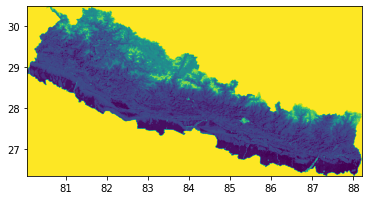

<AxesSubplot:>

In [36]:
show(raster_data2)

In [37]:
lst=ds.copy()

In [45]:
lst[np.where((lst>=10)&(lst<=40))]=1 #Agriculture
lst[np.where((lst>=50)&(lst<=100))]=2 #Forest
lst[np.where((lst>=110)&(lst<=180))]=3 #Grass land
lst[np.where((lst>=190))]=4 #Urban area
lst[np.where((lst>=200))]=5 #Bare Land
lst[np.where((lst>=210)&(lst<=220))]=6 #Water body
with rasterio.open('nepal_lulc3_out.tif','w',
                   driver=raster_data.driver,
                   height=raster_data.height,
                   width=raster_data.width,
                   count=raster_data.count,
                   crs=raster_data.crs,
                   transform=raster_data.transform,
                   dtype=ds.dtype
                  ) as dst:
    dst.write(lst)

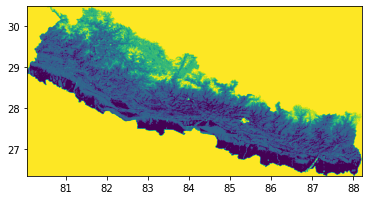

<AxesSubplot:>

In [46]:
show(rasterio.open('nepal_lulc3_out.tif'))